In [1]:
from dateutil import parser
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import gmaps
import gmaps.datasets
mpl.rcParams['font.size'] = 9

In [2]:
#create dataframe

from os import listdir
filepaths = [('Just_Eat_Data/') + f for f in listdir("./Just_Eat_Data") if f.endswith('.csv')]
print(filepaths)
data_set = pd.concat(map(pd.read_csv, filepaths))
data_set.dropna()

['Just_Eat_Data/04:20.csv', 'Just_Eat_Data/08:20.csv', 'Just_Eat_Data/06:20.csv', 'Just_Eat_Data/02:20.csv', 'Just_Eat_Data/12:19.csv', 'Just_Eat_Data/10:20.csv', 'Just_Eat_Data/02:21.csv', 'Just_Eat_Data/12:20.csv', 'Just_Eat_Data/10:19.csv', 'Just_Eat_Data/05:20.csv', 'Just_Eat_Data/09:20.csv', 'Just_Eat_Data/09:19.csv', 'Just_Eat_Data/07:20.csv', 'Just_Eat_Data/03:20.csv', 'Just_Eat_Data/11:20.csv', 'Just_Eat_Data/01:21.csv', 'Just_Eat_Data/01:20.csv', 'Just_Eat_Data/11:19.csv']


,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-04-01 01:41:11.814000+00:00,2020-04-01 02:28:08.128000+00:00,2816,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909
1,2020-04-01 04:52:10.586000+00:00,2020-04-01 05:45:32.129000+00:00,3201,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
2,2020-04-01 05:45:52.745000+00:00,2020-04-01 06:24:32.266000+00:00,2319,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536,-3.223434
3,2020-04-01 06:24:58.055000+00:00,2020-04-01 07:13:07.359000+00:00,2889,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536,-3.223434,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
4,2020-04-01 06:50:15.745000+00:00,2020-04-01 07:05:20.319000+00:00,904,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,2019-11-29 23:19:36.946000+00:00,2019-11-29 23:27:43.990000+00:00,487,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1720,Dundas Street,On corner of Henderson Row,55.960762,-3.201278
9745,2019-11-29 23:22:43.246000+00:00,2019-11-29 23:29:29.738000+00:00,406,259,St Andrew Square,North East corner,55.954906,-3.192444,1743,Logie Green Road,Outside Lidl,55.964058,-3.195700
9746,2019-11-29 23:25:03.496000+00:00,2019-11-29 23:43:20.440000+00:00,1096,1097,Gladstone Terrace,Corner of Gladstone Terrace and Sciennes Road,55.937963,-3.185021,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
9747,2019-11-29 23:29:57.437000+00:00,2019-11-29 23:47:18.314000+00:00,1040,250,Victoria Quay,Entrance to Scottish Government Office,55.977617,-3.174126,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332


In [3]:
len(data_set)

280376

In [4]:
data_set['started_at'] = pd.to_datetime(data_set['started_at'])
data_set['ended_at'] = pd.to_datetime(data_set['ended_at'])
data_set['duration'] = data_set['duration'] / 60
data_set = data_set.reset_index(drop=True)
np.random.seed(69)
data_set

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-04-01 01:41:11.814000+00:00,2020-04-01 02:28:08.128000+00:00,46.933333,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909
1,2020-04-01 04:52:10.586000+00:00,2020-04-01 05:45:32.129000+00:00,53.350000,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
2,2020-04-01 05:45:52.745000+00:00,2020-04-01 06:24:32.266000+00:00,38.650000,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536,-3.223434
3,2020-04-01 06:24:58.055000+00:00,2020-04-01 07:13:07.359000+00:00,48.150000,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536,-3.223434,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
4,2020-04-01 06:50:15.745000+00:00,2020-04-01 07:05:20.319000+00:00,15.066667,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280371,2019-11-29 23:19:36.946000+00:00,2019-11-29 23:27:43.990000+00:00,8.116667,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1720,Dundas Street,On corner of Henderson Row,55.960762,-3.201278
280372,2019-11-29 23:22:43.246000+00:00,2019-11-29 23:29:29.738000+00:00,6.766667,259,St Andrew Square,North East corner,55.954906,-3.192444,1743,Logie Green Road,Outside Lidl,55.964058,-3.195700
280373,2019-11-29 23:25:03.496000+00:00,2019-11-29 23:43:20.440000+00:00,18.266667,1097,Gladstone Terrace,Corner of Gladstone Terrace and Sciennes Road,55.937963,-3.185021,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
280374,2019-11-29 23:29:57.437000+00:00,2019-11-29 23:47:18.314000+00:00,17.333333,250,Victoria Quay,Entrance to Scottish Government Office,55.977617,-3.174126,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332


Hypothesis - The occurence of the pandemic and placement of lockdown has increased the total number of time spent using just eat bikes

In [5]:
def histogram(df, df1):
    time_span = np.max(df1['started_at']) - np.min(df1['started_at'])
    time_bins = int(time_span.days)
    print(time_bins)
    
    sns.set_style("ticks")
    f, (box, histo) = plt.subplots(2)
    f.set_size_inches(6,4)

    f.suptitle('Analysis of the Number of Trips Taken per Day')
    
    sns.boxplot(x = df['frequency'], ax = box)
    box.set_xlabel('Frequency of Trips per Day')
    
    
    sns.histplot(df1['started_at'], bins = time_bins, ax = histo, kde = True)
    histo.set_xlabel('Dates')
    histo.set_ylabel('Number of Trips Taken')



        frequency
count  176.000000
mean   354.204545
std    115.371911
min    128.000000
25%    272.500000
50%    347.500000
75%    433.000000
max    789.000000
180


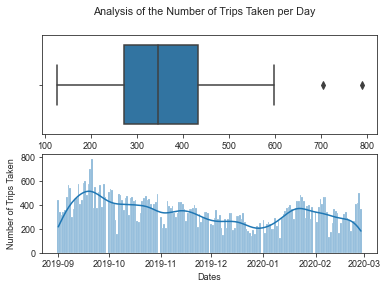

In [6]:
#Frequency of for each day - prepandemic

mask = (data_set['started_at'] < '2020-3-1')
data_set_prepandemic = data_set.loc[mask]
data_set_prepandemic = data_set_prepandemic.reset_index(drop=True)

data_set_prepandemic['started_at'] = pd.to_datetime(data_set_prepandemic['started_at']).dt.date
frequency_day_prepandemic = data_set_prepandemic['started_at'].value_counts()
frequency_day_prepandemic = pd.DataFrame(frequency_day_prepandemic)
frequency_day_prepandemic.rename(columns={'started_at':'frequency'}, inplace = True)
frequency_day_prepandemic['started_at'] = frequency_day_prepandemic.index
frequency_day_prepandemic = frequency_day_prepandemic.reset_index(drop = True)

print(frequency_day_prepandemic[['frequency']].describe())

histogram(frequency_day_prepandemic, data_set_prepandemic )

182
         frequency
count   178.000000
mean    804.207865
std     416.205236
min     117.000000
25%     476.750000
50%     738.500000
75%    1060.250000
max    2428.000000


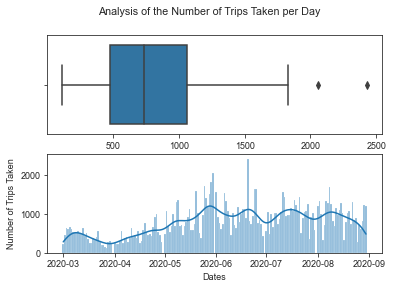

In [7]:
#Frequency of for each day - 6m pandemic
mask = (data_set['started_at'] >= '2020-03-1') & (data_set['started_at'] < '2020-9-1')
data_set_6mpandemic = data_set.loc[mask]
data_set_6mpandemic = data_set_6mpandemic.reset_index(drop=True)

data_set_6mpandemic['started_at'] = pd.to_datetime(data_set_6mpandemic['started_at']).dt.date
frequency_day_6mpandemic = data_set_6mpandemic['started_at'].value_counts()
frequency_day_6mpandemic = pd.DataFrame(frequency_day_6mpandemic)
frequency_day_6mpandemic.rename(columns={'started_at':'frequency'}, inplace = True)
frequency_day_6mpandemic['started_at'] = frequency_day_6mpandemic.index
frequency_day_6mpandemic = frequency_day_6mpandemic.reset_index(drop = True)

histogram(frequency_day_6mpandemic, data_set_6mpandemic)

print(frequency_day_6mpandemic[['frequency']].describe())

         frequency
count   175.000000
mean    427.925714
std     284.973966
min      50.000000
25%     176.500000
50%     355.000000
75%     676.500000
max    1130.000000
179


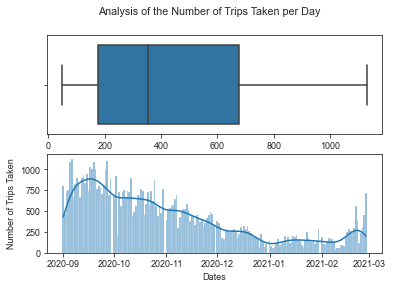

In [8]:
#Frequency of for each day - 6m - 12m pandemic
mask = (data_set['started_at'] > '2020-9-1')
data_set_612mpandemic = data_set.loc[mask]
data_set_612mpandemic = data_set_612mpandemic.reset_index(drop=True)

data_set_612mpandemic['started_at'] = pd.to_datetime(data_set_612mpandemic['started_at']).dt.date
frequency_day_612mpandemic = data_set_612mpandemic['started_at'].value_counts()
frequency_day_612mpandemic = pd.DataFrame(frequency_day_612mpandemic)
frequency_day_612mpandemic.rename(columns={'started_at':'frequency'}, inplace = True)
frequency_day_612mpandemic['started_at'] = frequency_day_612mpandemic.index
frequency_day_612mpandemic = frequency_day_612mpandemic.reset_index(drop = True)

print(frequency_day_612mpandemic[['frequency']].describe())
histogram(frequency_day_612mpandemic, data_set_612mpandemic)

In [9]:
mask = (data_set['started_at'] < '2020-3-1')
data_set_prepandemic = data_set.loc[mask]
data_set_prepandemic = data_set_prepandemic.reset_index(drop=True)

mask = (data_set['started_at'] >= '2020-03-1') & (data_set['started_at'] < '2020-9-1')
data_set_6mpandemic = data_set.loc[mask]
data_set_6mpandemic = data_set_6mpandemic.reset_index(drop=True)

mask = (data_set['started_at'] > '2020-9-1')
data_set_612mpandemic = data_set.loc[mask]
data_set_612mpandemic = data_set_612mpandemic.reset_index(drop=True)


        frequency       poisson
count  176.000000  1.760000e+02
mean   354.204545  3.486099e-03
std    115.371911  6.472945e-03
min    128.000000  1.850367e-92
25%    272.500000  6.096605e-13
50%    347.500000  1.047613e-06
75%    433.000000  3.958180e-03
max    789.000000  2.119183e-02


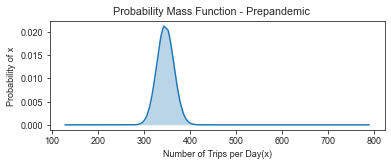

In [10]:
#pmf poisson prepandemic
time_span = np.max(frequency_day_prepandemic['started_at']) - np.min(frequency_day_prepandemic['started_at'])
time_span = int(time_span.days)
lam_pre = sum(frequency_day_prepandemic['frequency']) / time_span

px = []
for x in frequency_day_prepandemic['frequency']:
    px.append(sc.stats.poisson.pmf(x, lam_pre))

frequency_day_prepandemic['poisson'] = px

print(frequency_day_prepandemic.describe())

sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Prepandemic')
sns.lineplot(x = frequency_day_prepandemic['frequency'], y = frequency_day_prepandemic['poisson'], ax = graph)
graph.fill_between(frequency_day_prepandemic['frequency'], frequency_day_prepandemic['poisson'], alpha = 0.3)
graph.set_xlabel('Number of Trips per Day(x)')
graph.set_ylabel('Probability of x')


plt.show()
plt.close()

         frequency       poisson
count   178.000000  1.780000e+02
mean    804.207865  7.044137e-04
std     416.205236  2.518205e-03
min     117.000000  0.000000e+00
25%     476.750000  1.937163e-67
50%     738.500000  7.789064e-25
75%    1060.250000  4.433537e-10
max    2428.000000  1.414644e-02


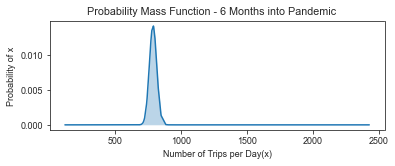

In [11]:
#pmf poisson 6mpandemic

time_span = np.max(frequency_day_6mpandemic['started_at']) - np.min(frequency_day_6mpandemic['started_at'])
time_span = int(time_span.days)
lam_6m = sum(frequency_day_6mpandemic['frequency']) / time_span

px = []
for x in frequency_day_6mpandemic['frequency']:
    px.append(sc.stats.poisson.pmf(x, lam_6m))

frequency_day_6mpandemic['poisson'] = px

print(frequency_day_6mpandemic.describe())


sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - 6 Months into Pandemic')
sns.lineplot(x = frequency_day_6mpandemic['frequency'], y = frequency_day_6mpandemic['poisson'], ax = graph)
graph.fill_between(frequency_day_6mpandemic['frequency'], frequency_day_6mpandemic['poisson'], alpha = 0.3)
graph.set_xlabel('Number of Trips per Day(x)')
graph.set_ylabel('Probability of x')

plt.show()
plt.close()

         frequency        poisson
count   175.000000   1.750000e+02
mean    427.925714   9.023337e-04
std     284.973966   3.216488e-03
min      50.000000  3.243458e-181
25%     176.500000   6.390752e-63
50%     355.000000   5.714503e-36
75%     676.500000   6.659983e-12
max    1130.000000   1.890321e-02


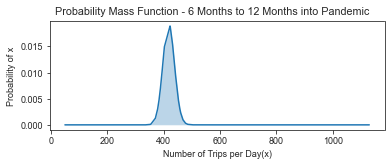

In [12]:
#pmf poisson 6mpandemic

time_span = np.max(frequency_day_612mpandemic['started_at']) - np.min(frequency_day_612mpandemic['started_at'])
time_span = int(time_span.days)
lam_612m = sum(frequency_day_612mpandemic['frequency']) / time_span

px = []
for x in frequency_day_612mpandemic['frequency']:
    px.append(sc.stats.poisson.pmf(x, lam_612m))

frequency_day_612mpandemic['poisson'] = px

print(frequency_day_612mpandemic.describe())


sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - 6 Months to 12 Months into Pandemic')
sns.lineplot(x = frequency_day_612mpandemic['frequency'], y = frequency_day_612mpandemic['poisson'], ax = graph)
graph.fill_between(frequency_day_612mpandemic['frequency'], frequency_day_612mpandemic['poisson'], alpha = 0.3)
graph.set_xlabel('Number of Trips per Day(x)')
graph.set_ylabel('Probability of x')

plt.show()
plt.close()

[330.]


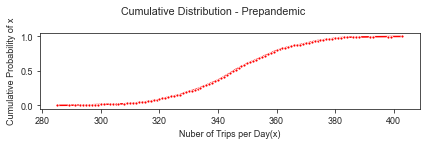

In [13]:
#cdf poisson prepandemic
sample_poisson_prepandemic = np.random.poisson(lam_pre, 1000)
n = len(sample_poisson_prepandemic)
sorted_sample = np.sort(sample_poisson_prepandemic)
cumulative_prob = np.arange(1, n+1)/n

print(np.percentile(sorted_sample, [20]))

sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Prepandemic')
sns.lineplot(x = sorted_sample, y = cumulative_prob, ax = graph, marker = '.', color= 'red')
graph.set_xlabel('Nuber of Trips per Day(x)')
graph.set_ylabel('Cumulative Probability of x')

plt.tight_layout()
plt.show()
plt.close()

[786.]


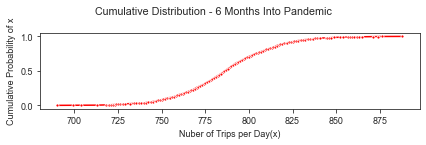

In [14]:
#cdf poisson 6m pandemic
sample_poisson_6mpandemic = np.random.poisson(lam_6m, 1000)
n = len(sample_poisson_6mpandemic)
sorted_sample = np.sort(sample_poisson_6mpandemic)
cumulative_prob = np.arange(1, n+1)/n

print(np.percentile(sorted_sample, [50]))

sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - 6 Months Into Pandemic')
sns.lineplot(x = sorted_sample, y = cumulative_prob, ax = graph, marker = '.', color= 'red')
graph.set_xlabel('Nuber of Trips per Day(x)')
graph.set_ylabel('Cumulative Probability of x')

plt.tight_layout()
plt.show()
plt.close()

[419.]


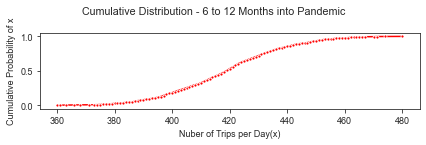

In [15]:
#cdf poisson 612m pandemic
sample_poisson_612mpandemic = np.random.poisson(lam_612m, 1000)
n = len(sample_poisson_612mpandemic)
sorted_sample = np.sort(sample_poisson_612mpandemic)
cumulative_prob = np.arange(1, n+1)/n

print(np.percentile(sorted_sample, [50]))

sns.set_style("ticks")
f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - 6 to 12 Months into Pandemic')
sns.lineplot(x = sorted_sample, y = cumulative_prob, ax = graph, marker = '.', color= 'red')
graph.set_xlabel('Nuber of Trips per Day(x)')
graph.set_ylabel('Cumulative Probability of x')

plt.tight_layout()
plt.show()
plt.close()

In [16]:
#time difference between each trip prepandemic
exp_prepandemic = data_set_prepandemic['started_at']
exp_prepandemic = pd.DataFrame(exp_prepandemic)
exp_prepandemic.sort_values(by = 'started_at', ascending = True, inplace = True)
exp_prepandemic['time_between'] = exp_prepandemic['started_at'].diff()
exp_prepandemic['time_between'] = (exp_prepandemic['time_between'].dt.total_seconds())/60
exp_prepandemic = exp_prepandemic.reset_index(drop = True)
exp_prepandemic = exp_prepandemic.dropna()

mean_between_pre = np.mean(exp_prepandemic['time_between'])
print(exp_prepandemic.describe())

       time_between
count  62339.000000
mean       4.180498
std       16.439213
min        0.000000
25%        0.555450
50%        1.640433
75%        4.091733
max     1469.466583


In [17]:
#time difference between each trip 6mpandemic
exp_6mpandemic = data_set_6mpandemic['started_at']
exp_6mpandemic = pd.DataFrame(exp_6mpandemic)
exp_6mpandemic.sort_values(by = 'started_at', ascending = True, inplace = True)
exp_6mpandemic['time_between'] = exp_6mpandemic['started_at'].diff()
exp_6mpandemic['time_between'] = (exp_6mpandemic['time_between'].dt.total_seconds())/60
exp_6mpandemic = exp_6mpandemic.reset_index(drop = True)
exp_6mpandemic = exp_6mpandemic.dropna()

mean_between_6m = np.mean(exp_6mpandemic['time_between'])
print(exp_6mpandemic.describe())

        time_between
count  143148.000000
mean        1.840624
std        11.244924
min         0.000000
25%         0.198733
50%         0.571850
75%         1.510808
max      1602.987933


In [18]:
#time difference between each trip 612mpandemic
exp_612mpandemic = data_set_612mpandemic['started_at']
exp_612mpandemic = pd.DataFrame(exp_612mpandemic)
exp_612mpandemic.sort_values(by = 'started_at', ascending = True, inplace = True)
exp_612mpandemic['time_between'] = exp_612mpandemic['started_at'].diff()
exp_612mpandemic['time_between'] = (exp_612mpandemic['time_between'].dt.total_seconds())/60
exp_612mpandemic = exp_612mpandemic.reset_index(drop = True)
exp_612mpandemic = exp_612mpandemic.dropna()

mean_between_612m = np.mean(exp_612mpandemic['time_between'])
print(exp_612mpandemic.describe())

       time_between
count  74886.000000
mean       3.460841
std       16.157912
min        0.000000
25%        0.370800
50%        1.097817
75%        2.919242
max     1688.526950


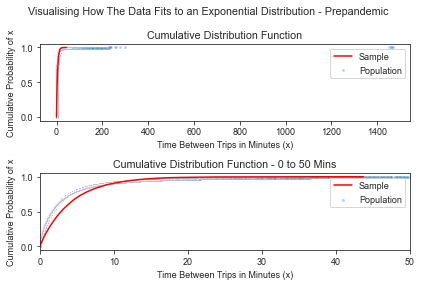

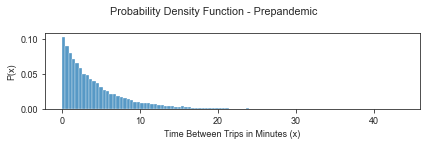

In [19]:
#cumulative distribution for exponential on timebetween trips prepandemic
n1 = len(exp_prepandemic['time_between'])
sorted_pop = np.sort(exp_prepandemic['time_between'])
cumulative_pop = np.arange(1, n1+1)/n1

sample_exp_pre = np.random.exponential(mean_between_pre, size = 40000)
n2 = len(sample_exp_pre)
sorted_sample = np.sort(sample_exp_pre)
cumulative_sample = np.arange(1, n2+1)/n2


sns.set_style("ticks")
f, (cumul, cumul1) = plt.subplots(2)
f.set_size_inches(6,4)
f.suptitle('Visualising How The Data Fits to an Exponential Distribution - Prepandemic')
    
sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul, color = 'red', ci = None, legend = 'brief')
cumul.set_xlabel('Time Between Trips in Minutes (x)')
cumul.set_ylabel('Cumulative Probability of x')
cumul.legend(['Sample', 'Population'])
cumul.set(title = 'Cumulative Distribution Function')

sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul1, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul1, color = 'red', ci = None, legend = 'brief')
cumul1.set_xlabel('Time Between Trips in Minutes (x)')
cumul1.set_ylabel('Cumulative Probability of x')
cumul1.legend(['Sample', 'Population'])
cumul1.set(xlim = (0,50))
cumul1.set(title = 'Cumulative Distribution Function - 0 to 50 Mins')

plt.tight_layout()
plt.show()
plt.close()


f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - Prepandemic')
sns.histplot(sample_exp_pre, bins = 100, ax = expo, kde = False, stat = "probability")
expo.set_xlabel('Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.tight_layout()
plt.show()
plt.close()


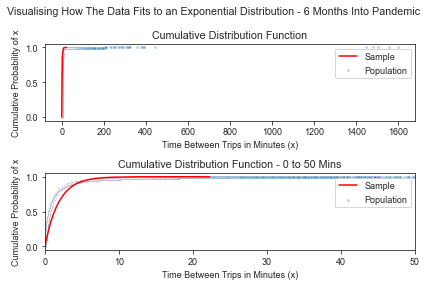

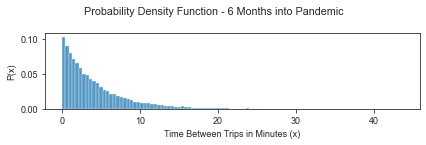

In [20]:
#cumulative distribution for exponential on timebetween trips 6m Pandemic

n1 = len(exp_6mpandemic['time_between'])
sorted_pop = np.sort(exp_6mpandemic['time_between'])
cumulative_pop = np.arange(1, n1+1)/n1

sample_exp_6m = np.random.exponential(mean_between_6m, size = 40000)
n2 = len(sample_exp_6m)
sorted_sample = np.sort(sample_exp_6m)
cumulative_sample = np.arange(1, n2+1)/n2

sns.set_style("ticks")
f, (cumul, cumul1) = plt.subplots(2)
f.set_size_inches(6,4)
f.suptitle('Visualising How The Data Fits to an Exponential Distribution - 6 Months Into Pandemic')
    
sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul, color = 'red', ci = None, legend = 'brief')
cumul.set_xlabel('Time Between Trips in Minutes (x)')
cumul.set_ylabel('Cumulative Probability of x')
cumul.legend(['Sample', 'Population'])
cumul.set(title = 'Cumulative Distribution Function')

sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul1, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul1, color = 'red', ci = None, legend = 'brief')
cumul1.set_xlabel('Time Between Trips in Minutes (x)')
cumul1.set_ylabel('Cumulative Probability of x')
cumul1.legend(['Sample', 'Population'])
cumul1.set(xlim = (0,50))
cumul1.set(title = 'Cumulative Distribution Function - 0 to 50 Mins')

plt.tight_layout()
plt.show()
plt.close()


f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - 6 Months into Pandemic')
sns.histplot(sample_exp_pre, bins = 100, ax = expo, kde = False, stat = "probability")
expo.set_xlabel('Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.tight_layout()
plt.show()
plt.close()



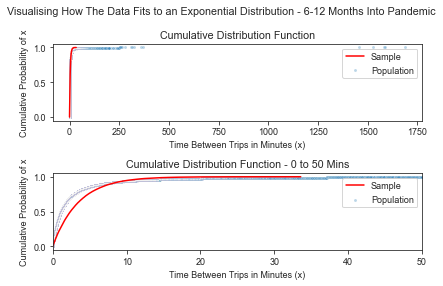

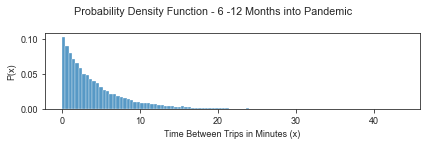

In [21]:
#cumulative distribution for exponential on timebetween trips 6m - 12m Pandemic

n1 = len(exp_612mpandemic['time_between'])
sorted_pop = np.sort(exp_612mpandemic['time_between'])
cumulative_pop = np.arange(1, n1+1)/n1

sample_exp_612m = np.random.exponential(mean_between_612m, size = 40000)
n2 = len(sample_exp_612m)
sorted_sample = np.sort(sample_exp_612m)
cumulative_sample = np.arange(1, n2+1)/n2

sns.set_style("ticks")
f, (cumul, cumul1) = plt.subplots(2)
f.set_size_inches(6,4)
f.suptitle('Visualising How The Data Fits to an Exponential Distribution - 6-12 Months Into Pandemic')
    
sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul, color = 'red', ci = None, legend = 'brief')
cumul.set_xlabel('Time Between Trips in Minutes (x)')
cumul.set_ylabel('Cumulative Probability of x')
cumul.legend(['Sample', 'Population'])
cumul.set(title = 'Cumulative Distribution Function')

sns.scatterplot(x = sorted_pop, y = cumulative_pop, ax = cumul1, alpha = 0.3, marker = '.')
sns.lineplot(x = sorted_sample, y = cumulative_sample, ax = cumul1, color = 'red', ci = None, legend = 'brief')
cumul1.set_xlabel('Time Between Trips in Minutes (x)')
cumul1.set_ylabel('Cumulative Probability of x')
cumul1.legend(['Sample', 'Population'])
cumul1.set(xlim = (0,50))
cumul1.set(title = 'Cumulative Distribution Function - 0 to 50 Mins')

plt.tight_layout()
plt.show()
plt.close()


f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - 6 -12 Months into Pandemic')
sns.histplot(sample_exp_pre, bins = 100, ax = expo, kde = False, stat = "probability")
expo.set_xlabel('Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.tight_layout()
plt.show()
plt.close()




[4.05995614 4.31605444]


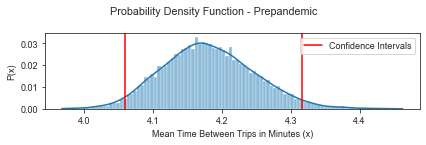

In [22]:
#confidence intervals for mean from bootstrap replicate - prepandemic

replicates = np.empty(10000)
for x in range(10000):
    replicate = np.random.choice(exp_prepandemic['time_between'], len(exp_prepandemic['time_between']))
    replicates[x] = np.mean(replicate)

confidence = np.percentile(replicates, [2.5, 97.5])
print(confidence)

f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - Prepandemic')
sns.histplot(replicates, bins = 100, ax = expo, kde = True, stat = "probability")
expo.set_xlabel('Mean Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.axvline(confidence[0], color='red', label='Confidence Intervals')
plt.axvline(confidence[1], color='red')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#confidence intervals for mean from bootstrap replicate - 6m pandemic

replicates = np.empty(10000)
for x in range(10000):
    replicate = np.random.choice(exp_6mpandemic['time_between'], len(exp_6mpandemic['time_between']))
    replicates[x] = np.mean(replicate)

confidence = np.percentile(replicates, [2.5, 97.5])
print(confidence)

f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - 6 Months Into Pandemic')
sns.histplot(replicates, bins = 100, ax = expo, kde = True, stat = "probability")
expo.set_xlabel('Mean Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.axvline(confidence[0], color='red', label='Confidence Intervals')
plt.axvline(confidence[1], color='red')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#confidence intervals for mean from bootstrap replicate - 6m-12m pandemic

replicates = np.empty(10000)
for x in range(10000):
    replicate = np.random.choice(exp_612mpandemic['time_between'], len(exp_612mpandemic['time_between']))
    replicates[x] = np.mean(replicate)

confidence = np.percentile(replicates, [2.5, 97.5])
print(confidence)

f, (expo) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Density Function - 6-12 Months Into Pandemic')
sns.histplot(replicates, bins = 100, ax = expo, kde = True, stat = "probability")
expo.set_xlabel('Mean Time Between Trips in Minutes (x)')
expo.set_ylabel('P(x)')

plt.axvline(confidence[0], color='red', label='Confidence Intervals')
plt.axvline(confidence[1], color='red')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()